In [1]:
import pandas as pd
import numpy as np
#graphe , correlation
import matplotlib.pyplot as plt
import seaborn as sns
## KNNImputer pour la correlation , remplace les valeurs nulles
from sklearn.impute import KNNImputer

# User Story 1 : Chargement et Analyse exploratoire des donn√©es (EDA)

<span style="color:#007ACC; font-weight:bold">
Importer les donn√©es √† l‚Äôaide de pandas.  
Comprendre la structure g√©n√©rale du jeu de donn√©es (types, dimensions, aper√ßus).
</span>



In [2]:

df = pd.read_csv("dataset-diabete.csv")   
df.head()   


Unnamed: 0  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  \
0           0            6      148             72             35        0   
1           1            1       85             66             29        0   
2           2            8      183             64              0        0   
3           3            1       89             66             23       94   
4           4            0      137             40             35      168   

    BMI  DiabetesPedigreeFunction  Age  
0  33.6                     0.627   50  
1  26.6                     0.351   31  
2  23.3                     0.672   32  
3  28.1                     0.167   21  
4  43.1                     2.288   33

In [3]:
df.describe()

Unnamed: 0  Pregnancies     Glucose  BloodPressure  SkinThickness  \
count  768.000000   768.000000  768.000000     768.000000     768.000000   
mean   383.500000     3.845052  120.894531      69.105469      20.536458   
std    221.846794     3.369578   31.972618      19.355807      15.952218   
min      0.000000     0.000000    0.000000       0.000000       0.000000   
25%    191.750000     1.000000   99.000000      62.000000       0.000000   
50%    383.500000     3.000000  117.000000      72.000000      23.000000   
75%    575.250000     6.000000  140.250000      80.000000      32.000000   
max    767.000000    17.000000  199.000000     122.000000      99.000000   

          Insulin         BMI  DiabetesPedigreeFunction         Age  
count  768.000000  768.000000                768.000000  768.000000  
mean    79.799479   31.992578                  0.471876   33.240885  
std    115.244002    7.884160                  0.331329   11.760232  
min      0.000000    0.000000                  0.078000   21.000000  
25%      0.000000   27.300000                  0.243750   24.000000  
50%     30.500000   32.000000                  0.372500   29.000000  
75%    127.250000   36.600000                  0.626250   41.000000  
max    846.000000   67.100000                  2.420000   81.000000

<span style="color:#007ACC; font-weight:bold">Identifier les valeurs manquantes et les doublons.</span>  

Apr√®s la description des donn√©es, on remarque qu‚Äôil y a des valeurs √©gales √† 0 pour certaines features qui, logiquement, ne peuvent pas avoir de valeur 0.  
Nous allons donc consid√©rer ces valeurs comme des valeurs nulles et manquantes.
<ul>
<li>1 _ on remplace les 0 par NA</li>
<li>2 _ on supprime les doublons</li>
<li>3 _ on compte les valeurs manquantes</li>
</ul>


In [4]:
# Colonnes o√π 0 n'est pas valide
cols_to_fix = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
# Remplacer les 0 par NaN
df[cols_to_fix] = df[cols_to_fix].replace(0, pd.NA)


# supprimer les doublons
    # Afficher le nombre de doublons avant suppression
print("Nombre de doublons avant :", df.duplicated().sum())
    # Supprimer les doublons
df = df.drop_duplicates()
    # V√©rifier apr√®s suppression
print("Nombre de doublons apr√®s :", df.duplicated().sum())


# compter les valeurs manquantes
print("Somme des valeurs null : \n" ,df.isnull().sum())

Nombre de doublons avant : 0
Nombre de doublons apr√®s : 0
Somme des valeurs null : 
 Unnamed: 0                    0
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64


Analyser la distribution des variables num√©riques.


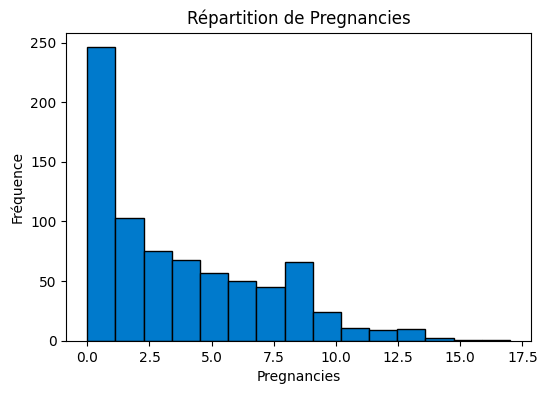

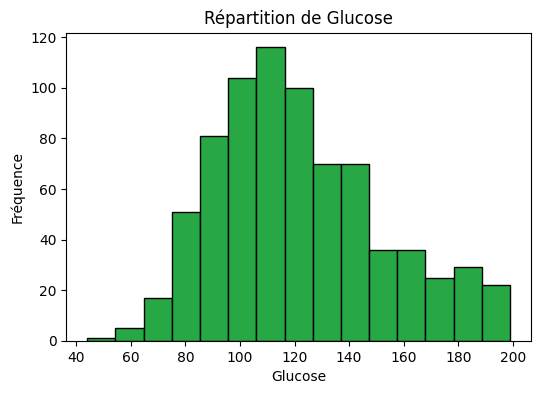

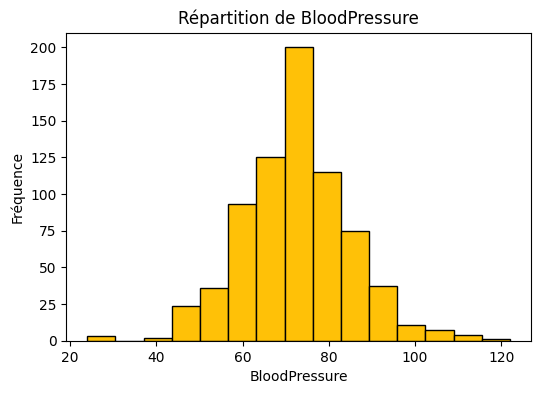

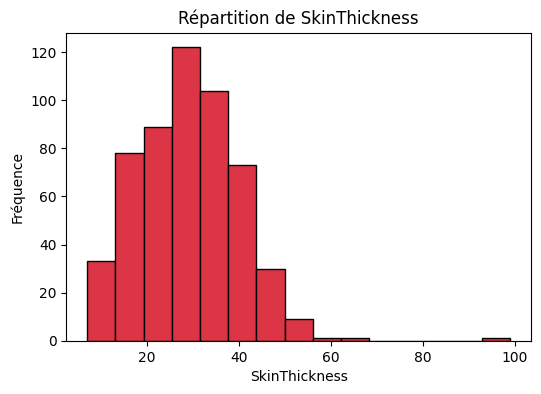

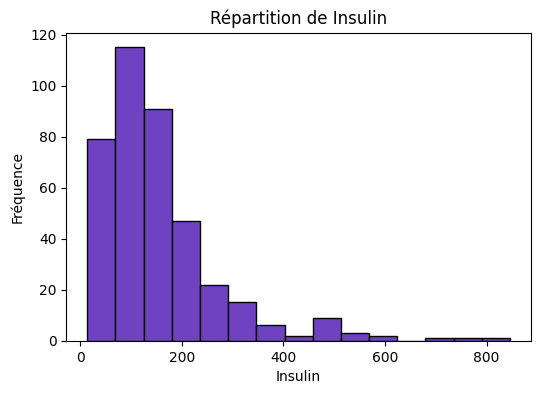

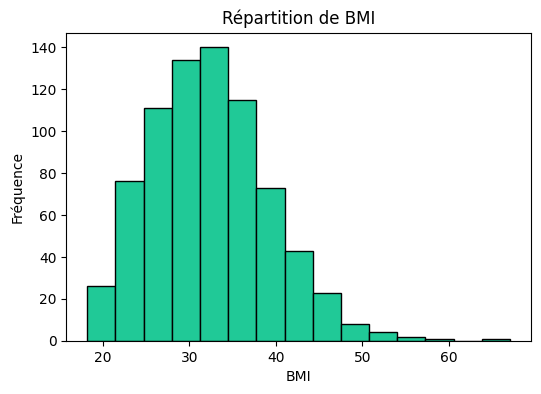

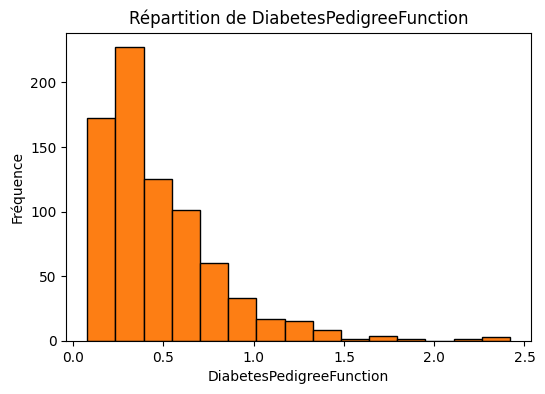

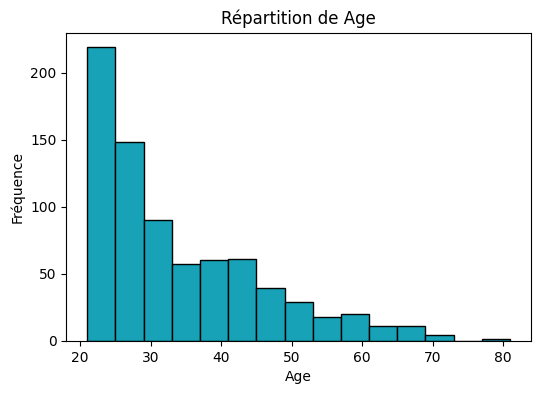

In [5]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# plt.hist(df["Age"], bins=20, color="skyblue", edgecolor="black")
# plt.title("R√©partition de l'√¢ge")
# plt.xlabel("√Çge")
# plt.ylabel("Fr√©quence")
# plt.show()


numeric_cols = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]
colors = ["#007ACC", "#28A745", "#FFC107", "#DC3545", "#6F42C1", "#20C997", "#FD7E14", "#17A2B8"]

for i, col in enumerate(numeric_cols):
    plt.figure(figsize=(6,4))
    plt.hist(df[col].dropna(), bins=15, color=colors[i], edgecolor="black")
    plt.title(f"R√©partition de {col}")
    plt.xlabel(col)
    plt.ylabel("Fr√©quence")
    plt.show()



<span style="color:#007ACC; font-weight:bold"> √âtudier les relations entre variables √† l‚Äôaide de matrices de  corr√©lation et de visualisations.</span>

<span style="color:red; font-weight:bold"> on repondant au question 1 de user story 2</span>
<span style="color:#007ACC; font-weight:bold"> Identifier et traiter les valeurs manquantes dans le jeu de donn√©es si elles existent. </span>

Pour r√©aliser la matrice de corr√©lation, il est n√©cessaire de **remplir les valeurs manquantes** au pr√©alable.  

Il existe plusieurs m√©thodes pour cela, comme l‚Äôimputation par la **moyenne** ou la **m√©diane**.  
Cette fois-ci, nous allons utiliser **KNNImputer (K-Nearest Neighbors)**.  

Cette m√©thode remplace chaque valeur manquante par une estimation bas√©e sur les **valeurs des k voisins les plus proches**, c‚Äôest-√†-dire des observations ayant des valeurs similaires ou proches dans les autres colonnes.  
Ainsi, on obtient des valeurs plus proches de la r√©alit√© que celles obtenues par moyenne ou m√©diane simples.  

**Contraintes et limites de KNNImputer :**  
- **Calcul intensif** : Trouver les k voisins les plus proches pour chaque valeur manquante peut √™tre co√ªteux, surtout pour de grands ensembles de donn√©es.  
- **Sensible aux valeurs aberrantes** : Les outliers peuvent influencer l‚Äôimputation en biaisant la moyenne des voisins.  
- **N√©cessite suffisamment de donn√©es** : Fonctionne mieux lorsqu‚Äôil y a assez d‚Äôobservations pour trouver des voisins fiables. Si la proportion de valeurs manquantes est trop √©lev√©e, la m√©thode peut √™tre moins efficace.


In [6]:
import pandas as pd
from sklearn.impute import KNNImputer

numeric_cols = [ "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction"]

# S'assurer que les colonnes sont num√©riques
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Cr√©er l'imputer KNN
imputer = KNNImputer(n_neighbors=5)  # n_neighbors=5 par d√©faut

# Appliquer l'imputer
df[numeric_cols] = pd.DataFrame(imputer.fit_transform(df[numeric_cols]), columns=numeric_cols)

# V√©rifier qu'il n'y a plus de valeurs manquantes
print(df[numeric_cols].isnull().sum())



Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
dtype: int64


on a trait√© les donn√©es on passe au correlation 

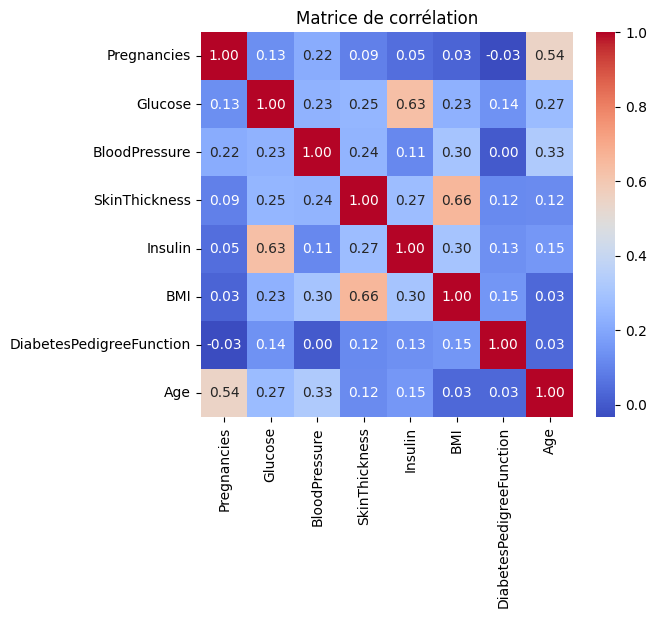

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt


numeric_cols = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]

corr = df[numeric_cols].corr()


# affiche sous format matrice
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corr√©lation")
plt.show()



<span style="color:red">Analyse :</span>

** Corr√©lations fortes**

- **Insulin & Glucose ‚Üí 0.63**  
  Les niveaux d‚Äôinsuline augmentent g√©n√©ralement avec la glyc√©mie. Corr√©lation logique biologiquement.

- **BMI & SkinThickness ‚Üí 0.64**  
  Plus le BMI est √©lev√©, plus l‚Äô√©paisseur cutan√©e (SkinThickness) est grande, coh√©rent avec l‚Äôindice de masse corporelle.

- **Age & Pregnancies ‚Üí 0.54**  
  Plus l‚Äô√¢ge augmente, plus le nombre de grossesses a tendance √† √™tre √©lev√©.


## User Story 2 : Pr√©traitement des donn√©es - Gestion des valeurs manquantes et aberrantes

<span style="color:#007ACC; font-weight:bold"> Identifier et traiter les valeurs manquantes dans le jeu de donn√©es si elles existent. </span>  
la reponse en haut dans la reponse de la question de correlation d user story 1

<span style="color:#007ACC; font-weight:bold">Utiliser des techniques statistiques (ex. : bo√Æte √† moustaches, z-score, IQR) pour d√©tecter les outliers. </span>  

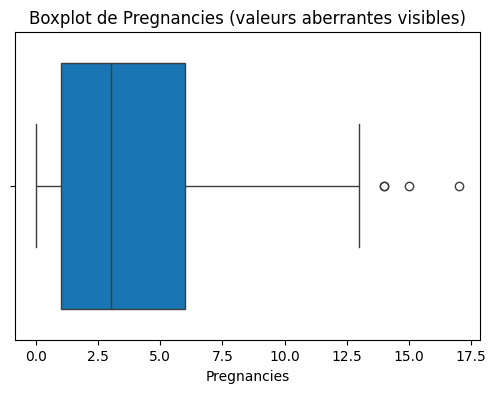

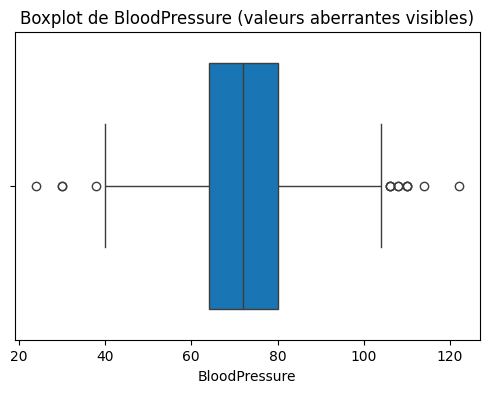

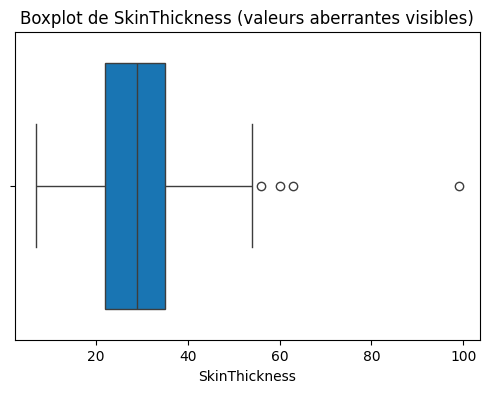

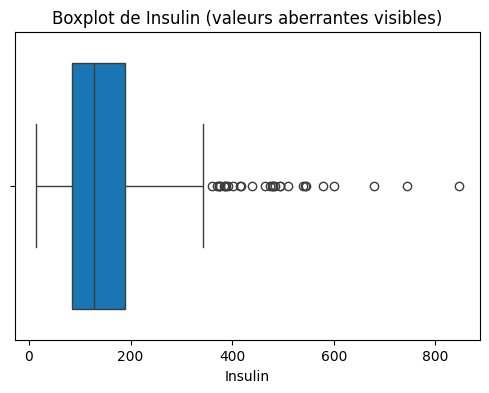

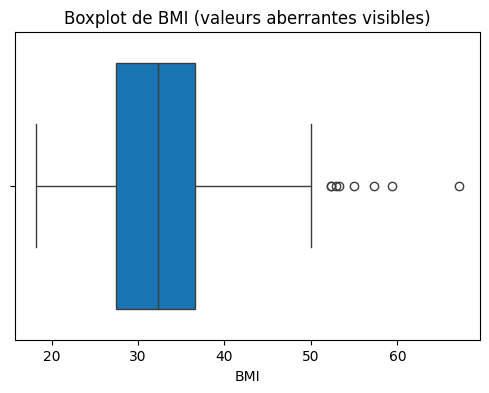

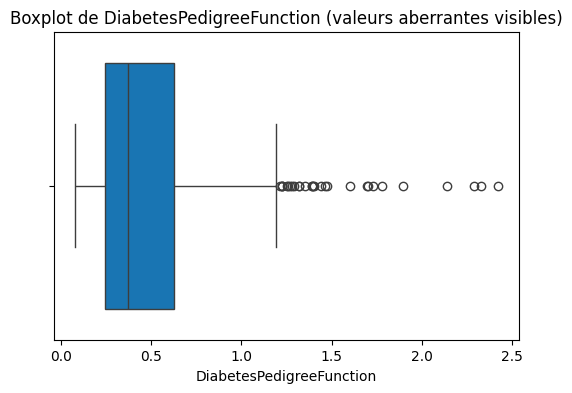

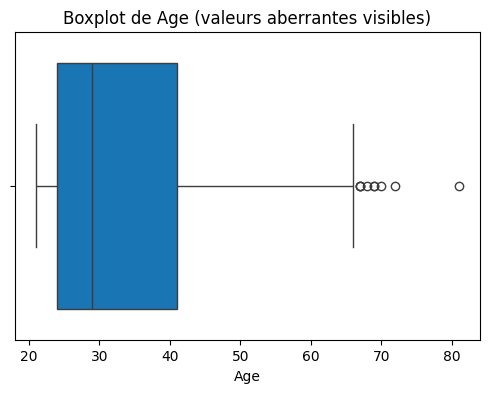

Unnamed: 0 : 0 outliers d√©tect√©s
Pregnancies : 4 outliers d√©tect√©s
Glucose : 0 outliers d√©tect√©s
BloodPressure : 14 outliers d√©tect√©s
SkinThickness : 4 outliers d√©tect√©s
Insulin : 30 outliers d√©tect√©s
BMI : 8 outliers d√©tect√©s
DiabetesPedigreeFunction : 29 outliers d√©tect√©s
Age : 9 outliers d√©tect√©s


In [8]:

# S√©lectionner les colonnes num√©riques
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Fonction pour d√©tecter les outliers selon l'IQR
def detect_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    return outliers


# Affichage des boxplots pour chaque colonne
for col in numerical_cols:
    outliers = detect_outliers_iqr(df, col)
    if len(outliers)!= 0 :  # j affiche boite a moutache seulement pour les features avec valeur aberrante
        plt.figure(figsize=(6,4))
        sns.boxplot(x=df[col], color="#007ACC")
        plt.title(f"Boxplot de {col} (valeurs aberrantes visibles)")
        plt.show()
# D√©tecter les outliers pour chaque colonne num√©rique
for col in numerical_cols:
    outliers = detect_outliers_iqr(df, col)
    print(f"{col} : {len(outliers)} outliers d√©tect√©s")


<span style="color:red">Analyse :</span> Le Z-score n‚Äôest pas pertinent dans notre cas, car il s‚Äôapplique principalement √† des donn√©es sym√©triques et suivant une distribution normale.
Nos variables ne respectant pas cette condition, il est donc pr√©f√©rable d‚Äôutiliser la m√©thode des quartiles (IQR), qui est plus robuste face aux distributions asym√©triques et aux valeurs extr√™mes.

<span style="color:#007ACC; font-weight:bold">G√©rer les lignes contenant des valeurs aberrantes dans les colonnes pertinentes</span>
Nous allons d‚Äôabord visualiser les valeurs aberrantes afin de mieux comprendre la distribution des donn√©es et identifier si elles sont plausibles ou erron√©es.
Dans le contexte des valeurs aberrantes :

Une valeur est plausible si elle pourrait r√©ellement exister.

Exemple : Pregnancies = 15 ‚Üí rare, mais biologiquement possible ‚Üí plausible.

Une valeur est non plausible si elle r√©sulte probablement d‚Äôune erreur.

Exemple : BloodPressure = 300 ‚Üí tr√®s improbable ‚Üí non plausible.

In [12]:
import pandas as pd

# Suppose ton DataFrame s'appelle df
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Affichage des valeurs aberrantes par feature
for col in numeric_cols:
    outliers_col = df[(df[col] < lower_bound[col]) | (df[col] > upper_bound[col])]
    print(f"\nüîπ {col} ‚Üí {len(outliers_col)} valeurs aberrantes d√©tect√©es")
    print(outliers_col[[col]])




üîπ Unnamed: 0 ‚Üí 0 valeurs aberrantes d√©tect√©es
Empty DataFrame
Columns: [Unnamed: 0]
Index: []

üîπ Pregnancies ‚Üí 4 valeurs aberrantes d√©tect√©es
     Pregnancies
88            15
159           17
298           14
455           14

üîπ Glucose ‚Üí 0 valeurs aberrantes d√©tect√©es
Empty DataFrame
Columns: [Glucose]
Index: []

üîπ BloodPressure ‚Üí 14 valeurs aberrantes d√©tect√©es
     BloodPressure
18            30.0
43           110.0
84           108.0
106          122.0
125           30.0
177          110.0
362          108.0
549          110.0
597           24.0
599           38.0
658          106.0
662          106.0
672          106.0
691          114.0

üîπ SkinThickness ‚Üí 4 valeurs aberrantes d√©tect√©es
     SkinThickness
57            60.0
120           56.0
445           63.0
579           99.0

üîπ Insulin ‚Üí 30 valeurs aberrantes d√©tect√©es
     Insulin
2      383.2
8      543.0
13     846.0
111    495.0
153    485.0
186    495.0
220    478.0
228    744.

In [13]:
import pandas as pd
from scipy.stats.mstats import winsorize

# Colonnes num√©riques
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# D√©tection des outliers selon IQR
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Fonction pour g√©rer les valeurs aberrantes selon le type
def handle_outliers(df, col):
    # Cas 1 : valeurs plausibles mais extr√™mes ‚Üí Winsorization
    if col in ['Pregnancies', 'BMI', 'Age', 'SkinThickness']:
        df[col] = winsorize(df[col], limits=(0.01, 0.01))  # Limiter 1% min et max
    
    # Cas 2 : valeurs aberrantes probablement dues √† une erreur ‚Üí imputer par mediane
    elif col in ['BloodPressure', 'Insulin', 'Glucose']:
        df[col] = df[col].mask((df[col] < lower_bound[col]) | (df[col] > upper_bound[col]), df[col].median())
    
    return df

# Appliquer la fonction pour chaque colonne
for col in numeric_cols:
    df = handle_outliers(df, col)

# V√©rifier les nouvelles valeurs aberrantes
for col in numeric_cols:
    outliers_col = df[(df[col] < lower_bound[col]) | (df[col] > upper_bound[col])]
    print(f"{col} : {len(outliers_col)} valeurs aberrantes restantes")


Unnamed: 0 : 0 valeurs aberrantes restantes
Pregnancies : 0 valeurs aberrantes restantes
Glucose : 0 valeurs aberrantes restantes
BloodPressure : 0 valeurs aberrantes restantes
SkinThickness : 0 valeurs aberrantes restantes
Insulin : 0 valeurs aberrantes restantes
BMI : 8 valeurs aberrantes restantes
DiabetesPedigreeFunction : 29 valeurs aberrantes restantes
Age : 9 valeurs aberrantes restantes
